In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

% matplotlib inline

UsageError: Line magic function `%` not found.


In [173]:
#parameters
N = 8  #spins
W = np.random.randn(N,N)  #Wij
theta = 0  #threshold
rep = 10000  #length of simulation
spins = np.random.choice((-1,1),N)

In [174]:
#iterations
for r in range(0,rep):
    p = np.random.randint(0,N)
    h = np.sign(np.sum(W[p]*spins[p])-theta)
    spins[p] = h

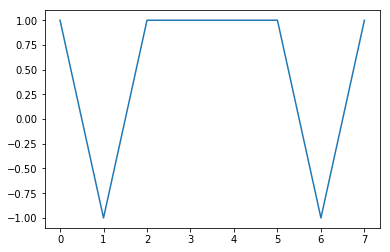

In [175]:
plt.plot(spins)

In [187]:
#memory and patterns
Wm = np.zeros((N,N))  #trained weights
K = 3  #patterns
ww = 1#/K  #normalization constant?
patterns = np.zeros((K,N))
for k in range(0,K):
    eps = np.random.choice((-1,1),N)
    patterns[k,:] = eps
    Wm = Wm + ww*np.outer(eps,eps)
Wm = Wm-np.diag(np.diag(Wm))

In [197]:
#recall
mu = 3
theta = 0  #threshold
rep = 50000  #length of simulation
spins = np.random.randint(0,2,size=N)
spins[spins==0] = -1
for r in range(0,rep):
    p = np.random.randint(0,N)
    h = np.sign(np.sum(Wm[:,p]*spins[p])-theta)
    if h==0:
        temp = np.random.choice((-1,1))
        spins[p] = temp
    else:
        spins[p] = h
    #spins[p] = h

In [198]:
inp = np.random.randint(0,2,size=N)
oup = np.sign(Wm.T @ inp - theta)

([], <a list of 0 Text yticklabel objects>)

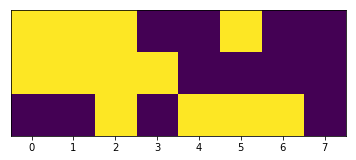

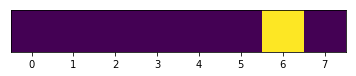

In [199]:
plt.imshow(patterns)
plt.yticks([])
plt.figure()
plt.imshow(np.expand_dims(oup,axis=0))
plt.yticks([])